In [ ]:
## for scraping

import requests
import numpy as np
import pandas as pd
import re
from sklearn.svm import SVC
from bs4 import BeautifulSoup
from sklearn.neighbors import KNeighborsClassifier 
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
##skill learn 
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score





In [ ]:

def getting_text(URLS):
    datas=[]
    titels=[]
    for URL in URLS:
        data=''
        page = requests.get(URL)
        results = BeautifulSoup(page.content, 'html.parser')
        job_elems = results.find_all('div', attrs={'class':'chapter'})
        titel = results.find_all('h1')
        for job_elem in job_elems:
            if None in (job_elem):
                continue
            data+=job_elem.text.strip()
        datas.append(data)
        titels.append(titel)
    return datas,titels


In [ ]:
def cleaning_text(datas):
    reviews=[]
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    for data in datas:
        review = re.sub('[^a-zA-Z0-9]', ' ', str(data))
        review=re.sub('<[^<]+?>', '', str(review))
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review ]
        review=" ".join(review)
        review=review.split()
        reviews.append(review)
    return reviews

In [ ]:
def cleaning_titletext(datas):
    reviews=[]
    for data in datas:
        review = re.sub('[^a-zA-Z0-9]', ' ', str(data))
        review = re.sub('  ', ' ', str(data))
        review=re.sub('<[^<]+?>', '', str(data))
        review=review.strip()
        review = review.lower()
        review=" ".join(review.split())
        review=review.split()
        reviews.append(review)
    z=[]
    for x in reviews:
        z.append(" ".join(x))
    return z

In [ ]:
def get_randomsample(reviews,title1):
        mo = pd.DataFrame()
        xie = pd.DataFrame()
        
        
        for x in range(len(title1)):
            m=[]
            for i in range(200):

                datai=np.random.choice(range(len(reviews[x])-100))
                dataf=reviews[x][datai:datai+100]
                m.append(" ".join(dataf))
            xie["Text"] =m 
            xie["label"]=title1[x]
            mo=mo.append(xie, ignore_index=True)
        
        return mo

        

In [ ]:
def get_randomsample2(reviews,title1):
        mo = pd.DataFrame()
        xie = pd.DataFrame()
        
        
        for x in range(len(title1)):
            m=[]
            for i in range(200):

                datai=np.random.choice(range(len(reviews[x])-100))
                dataf=reviews[x][datai:datai+20]
                m.append(" ".join(dataf))
            xie["Text"] =m 
            xie["label"]=title1[x]
            mo=mo.append(xie, ignore_index=True)
        
        return mo

        

In [ ]:
# Fit the pipeline with the data
def calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test):


  pipe.fit(X_train, y_train)
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score 
  y_pred_class = pipe.predict(X_test)

  print(accuracy_score(y_test, y_pred_class))

  cm = confusion_matrix(y_test, y_pred_class)
  import seaborn as sns
  sns.heatmap(cm, annot = True)
  return y_pred_class

In [ ]:
def calc_classification_report(y_pred_class):
  
  from sklearn.metrics import classification_report
  mat=classification_report(y_test, y_pred_class, target_names=['alice’s adventures in wonderland ',
                                                          'emma','d r a c u l a','the war of the worlds','uncle tom’s cabin or life among the lowly'])
  print(mat)


# Getting the books

In [ ]:
data,title=getting_text(['https://www.gutenberg.org/files/11/11-h/11-h.htm',
                         'https://www.gutenberg.org/files/158/158-h/158-h.htm',
                        'https://www.gutenberg.org/files/345/345-h/345-h.htm',
                         'https://www.gutenberg.org/files/36/36-h/36-h.htm',
                         'https://www.gutenberg.org/files/203/203-h/203-h.htm'
                        ])
review=cleaning_text(data)
title1=cleaning_titletext(title)
mo=get_randomsample(review,title1)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell2050\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
mo

,Text,label
0,poker will burn you if you hold it too long an...,[alice’s adventures in wonderland]
1,said veri polit if i had it written down but i...,[alice’s adventures in wonderland]
2,am but i d better take him hi fan and glove th...,[alice’s adventures in wonderland]
3,of anyth to say she simpli bow and took the th...,[alice’s adventures in wonderland]
4,head off shout the queen their head are gone i...,[alice’s adventures in wonderland]
...,...,...
995,in search of those pocket handkerchief which m...,[uncle tom’s cabin or life among the lowly]
996,a volum of mean lord know high didn t say dat ...,[uncle tom’s cabin or life among the lowly]
997,for the present how do you like it are you sur...,[uncle tom’s cabin or life among the lowly]
998,take them and me about in an open carriag and ...,[uncle tom’s cabin or life among the lowly]


In [ ]:
mo.groupby('label').label.count()

label
[alice’s adventures in wonderland]             200
[d r a c u l a]                                200
[emma]                                         200
[the war of the worlds]                        200
[uncle tom’s cabin or life among the lowly]    200
Name: label, dtype: int64

# Visualization:

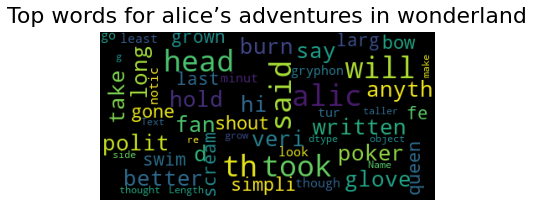

In [ ]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(mo.loc[mo['label'] == '[alice’s adventures in wonderland]', 'Text']))
fig = plt.figure(num=1)
plt.axis('off')
plt.title('Top words for alice’s adventures in wonderland', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc, cmap=None)
plt.show()

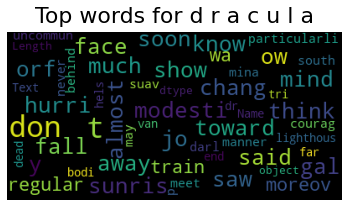

In [ ]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(mo.loc[mo['label'] == '[d r a c u l a]', 'Text']))
fig = plt.figure(num=1)
plt.axis('off')
plt.title('Top words for d r a c u l a', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc, cmap=None)
plt.show()


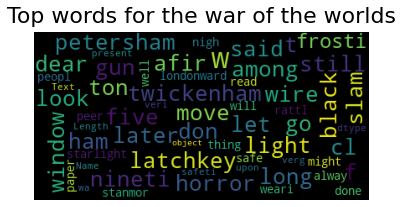

In [ ]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(mo.loc[mo['label'] == '[the war of the worlds]', 'Text']))
fig = plt.figure(num=1)
plt.axis('off')
plt.title('Top words for the war of the worlds', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc, cmap=None)
plt.show()

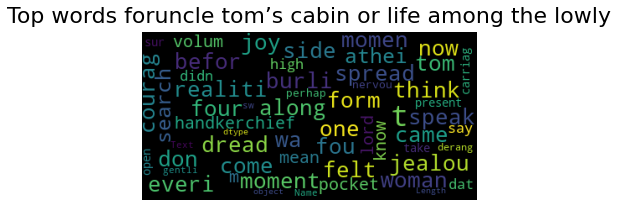

In [ ]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(mo.loc[mo['label'] == '[uncle tom’s cabin or life among the lowly]', 'Text']))
fig = plt.figure(num=1)
plt.axis('off')
plt.title('Top words foruncle tom’s cabin or life among the lowly', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc, cmap=None)
plt.show()

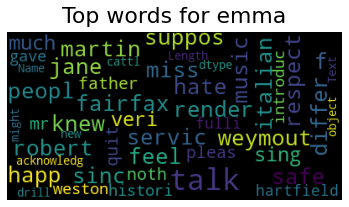

In [ ]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(mo.loc[mo['label'] == '[emma]', 'Text']))
fig = plt.figure(num=1)
plt.axis('off')
plt.title('Top words for emma', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc, cmap=None)
plt.show()

# data preparation 

In [ ]:

X = mo['Text']
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
y = LE.fit_transform(mo['label'])



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0,stratify=mo['label'])

# feature extraction and testing 

### NB With BOW

In [ ]:
pipe = Pipeline([('bow', CountVectorizer()), 
                 ('model', MultinomialNB())])

0.925


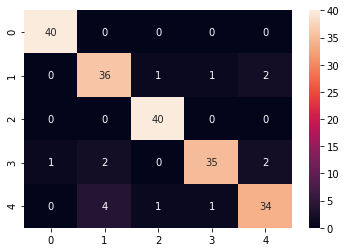

In [ ]:
 y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.98      1.00      0.99        40
                                     emma       0.86      0.90      0.88        40
                            d r a c u l a       0.95      1.00      0.98        40
                    the war of the worlds       0.95      0.88      0.91        40
uncle tom’s cabin or life among the lowly       0.89      0.85      0.87        40

                                 accuracy                           0.93       200
                                macro avg       0.93      0.93      0.92       200
                             weighted avg       0.93      0.93      0.92       200



### NB with bow and ngram

In [ ]:
pipe = Pipeline([('bow', CountVectorizer(ngram_range=(1,2))), 
                 ('model', MultinomialNB())])

0.93


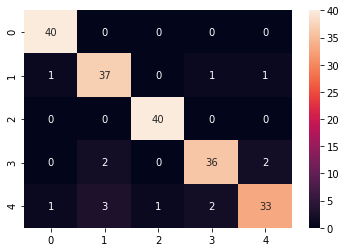

In [ ]:
 y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.95      1.00      0.98        40
                                     emma       0.88      0.93      0.90        40
                            d r a c u l a       0.98      1.00      0.99        40
                    the war of the worlds       0.92      0.90      0.91        40
uncle tom’s cabin or life among the lowly       0.92      0.82      0.87        40

                                 accuracy                           0.93       200
                                macro avg       0.93      0.93      0.93       200
                             weighted avg       0.93      0.93      0.93       200



### NB with TFIDF 

In [ ]:
pipe = Pipeline([('bow',CountVectorizer()), 
                 ('tfidf', TfidfTransformer()),                 
                 ('model', MultinomialNB())])

0.9


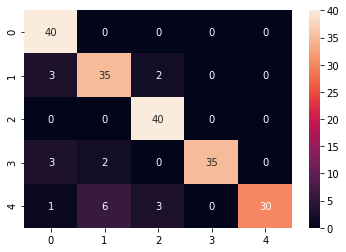

In [ ]:
 y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.85      1.00      0.92        40
                                     emma       0.81      0.88      0.84        40
                            d r a c u l a       0.89      1.00      0.94        40
                    the war of the worlds       1.00      0.88      0.93        40
uncle tom’s cabin or life among the lowly       1.00      0.75      0.86        40

                                 accuracy                           0.90       200
                                macro avg       0.91      0.90      0.90       200
                             weighted avg       0.91      0.90      0.90       200



### NB with TFIDF and ngram

In [ ]:
pipe = Pipeline([('bow', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()), 
                 ('model', MultinomialNB())])

0.88


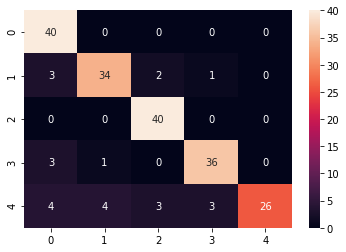

In [ ]:
 y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.80      1.00      0.89        40
                                     emma       0.87      0.85      0.86        40
                            d r a c u l a       0.89      1.00      0.94        40
                    the war of the worlds       0.90      0.90      0.90        40
uncle tom’s cabin or life among the lowly       1.00      0.65      0.79        40

                                 accuracy                           0.88       200
                                macro avg       0.89      0.88      0.88       200
                             weighted avg       0.89      0.88      0.88       200



# SVC

### SVC with bow only

In [ ]:
pipe = Pipeline([('bow', CountVectorizer()),
                 ('model', SVC())])

0.865


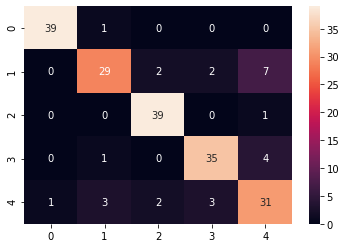

In [ ]:
 y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.97      0.97      0.97        40
                                     emma       0.85      0.72      0.78        40
                            d r a c u l a       0.91      0.97      0.94        40
                    the war of the worlds       0.88      0.88      0.88        40
uncle tom’s cabin or life among the lowly       0.72      0.78      0.75        40

                                 accuracy                           0.86       200
                                macro avg       0.87      0.86      0.86       200
                             weighted avg       0.87      0.86      0.86       200



### SVC with bow and ngrams

In [ ]:
pipe = Pipeline([('bow', CountVectorizer(ngram_range=(1,2))), 
                 ('model', SVC())])

0.835


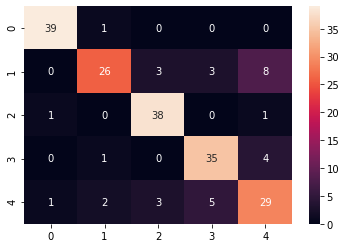

In [ ]:
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.95      0.97      0.96        40
                                     emma       0.87      0.65      0.74        40
                            d r a c u l a       0.86      0.95      0.90        40
                    the war of the worlds       0.81      0.88      0.84        40
uncle tom’s cabin or life among the lowly       0.69      0.72      0.71        40

                                 accuracy                           0.83       200
                                macro avg       0.84      0.83      0.83       200
                             weighted avg       0.84      0.83      0.83       200



### SVC with TF-IDF

In [ ]:
pipe = Pipeline([('bow', CountVectorizer()),
                ('tfidf', TfidfTransformer()), 
                 ('model', SVC())])

0.925


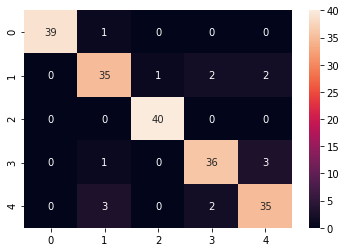

In [ ]:
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        1.00      0.97      0.99        40
                                     emma       0.88      0.88      0.88        40
                            d r a c u l a       0.98      1.00      0.99        40
                    the war of the worlds       0.90      0.90      0.90        40
uncle tom’s cabin or life among the lowly       0.88      0.88      0.88        40

                                 accuracy                           0.93       200
                                macro avg       0.93      0.93      0.92       200
                             weighted avg       0.93      0.93      0.92       200



### SVC with TF-IDF and ngrams

In [ ]:
pipe = Pipeline([('bow', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),  
                 ('model', SVC())])

0.91


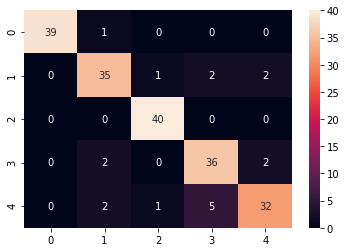

In [ ]:
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        1.00      0.97      0.99        40
                                     emma       0.88      0.88      0.88        40
                            d r a c u l a       0.95      1.00      0.98        40
                    the war of the worlds       0.84      0.90      0.87        40
uncle tom’s cabin or life among the lowly       0.89      0.80      0.84        40

                                 accuracy                           0.91       200
                                macro avg       0.91      0.91      0.91       200
                             weighted avg       0.91      0.91      0.91       200



# Decision Tree

### Pipe Using Decision tree model with bow only

In [ ]:
pipe = Pipeline([('bow', CountVectorizer()), 
                 ('model', tree.DecisionTreeClassifier())])

0.755


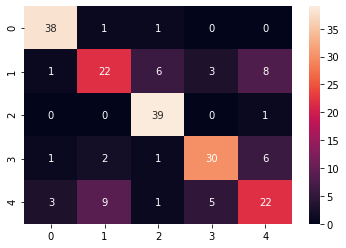

In [ ]:
# Fit the pipeline with the data
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.88      0.95      0.92        40
                                     emma       0.65      0.55      0.59        40
                            d r a c u l a       0.81      0.97      0.89        40
                    the war of the worlds       0.79      0.75      0.77        40
uncle tom’s cabin or life among the lowly       0.59      0.55      0.57        40

                                 accuracy                           0.76       200
                                macro avg       0.75      0.76      0.75       200
                             weighted avg       0.75      0.76      0.75       200



### Pipe Using Decision tree model with bow and ngram

In [ ]:
pipe = Pipeline([('bow', CountVectorizer(ngram_range=(1,2))), 
                 ('model', tree.DecisionTreeClassifier())])

0.75


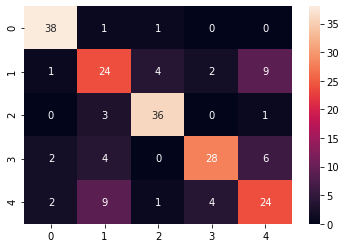

In [ ]:
# Fit the pipeline with the data
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.88      0.95      0.92        40
                                     emma       0.59      0.60      0.59        40
                            d r a c u l a       0.86      0.90      0.88        40
                    the war of the worlds       0.82      0.70      0.76        40
uncle tom’s cabin or life among the lowly       0.60      0.60      0.60        40

                                 accuracy                           0.75       200
                                macro avg       0.75      0.75      0.75       200
                             weighted avg       0.75      0.75      0.75       200



# Decision tree with TF-IDF only

In [ ]:
pipe = Pipeline([('bow', CountVectorizer()),
                ('tfidf', TfidfTransformer()), 
                 ('model', tree.DecisionTreeClassifier())])

0.785


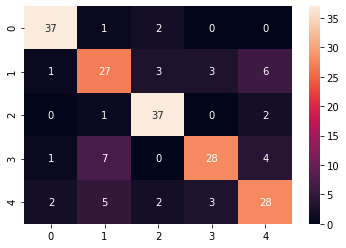

In [ ]:
# Fit the pipeline with the data
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.90      0.93      0.91        40
                                     emma       0.66      0.68      0.67        40
                            d r a c u l a       0.84      0.93      0.88        40
                    the war of the worlds       0.82      0.70      0.76        40
uncle tom’s cabin or life among the lowly       0.70      0.70      0.70        40

                                 accuracy                           0.79       200
                                macro avg       0.79      0.79      0.78       200
                             weighted avg       0.79      0.79      0.78       200



# Decision tree with TF-IDF ngrams

In [ ]:
pipe = Pipeline([('bow', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),  
                 ('model', tree.DecisionTreeClassifier())])

0.7


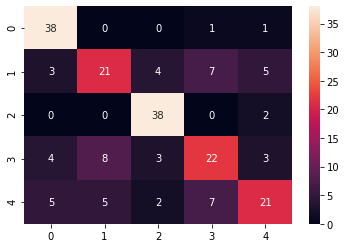

In [ ]:
# Fit the pipeline with the data
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.76      0.95      0.84        40
                                     emma       0.62      0.53      0.57        40
                            d r a c u l a       0.81      0.95      0.87        40
                    the war of the worlds       0.59      0.55      0.57        40
uncle tom’s cabin or life among the lowly       0.66      0.53      0.58        40

                                 accuracy                           0.70       200
                                macro avg       0.69      0.70      0.69       200
                             weighted avg       0.69      0.70      0.69       200



# KNN

### Pipe Using KNN model with bow only

In [ ]:

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('model', KNeighborsClassifier())])


0.73


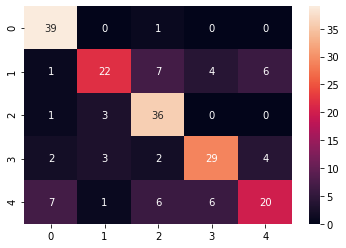

In [ ]:

# Fit the pipeline with the data
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.78      0.97      0.87        40
                                     emma       0.76      0.55      0.64        40
                            d r a c u l a       0.69      0.90      0.78        40
                    the war of the worlds       0.74      0.72      0.73        40
uncle tom’s cabin or life among the lowly       0.67      0.50      0.57        40

                                 accuracy                           0.73       200
                                macro avg       0.73      0.73      0.72       200
                             weighted avg       0.73      0.73      0.72       200



### Pipe Using KNN model with bow and ngrams

In [ ]:
pipe = Pipeline([('bow', CountVectorizer(ngram_range=(1,2))), 
                 ('model', KNeighborsClassifier())])

0.765


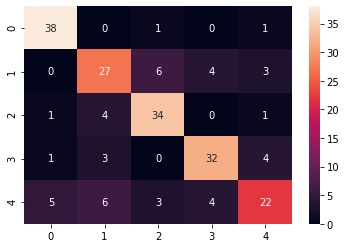

In [ ]:
# Fit the pipeline with the data
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.84      0.95      0.89        40
                                     emma       0.68      0.68      0.68        40
                            d r a c u l a       0.77      0.85      0.81        40
                    the war of the worlds       0.80      0.80      0.80        40
uncle tom’s cabin or life among the lowly       0.71      0.55      0.62        40

                                 accuracy                           0.77       200
                                macro avg       0.76      0.77      0.76       200
                             weighted avg       0.76      0.77      0.76       200



### KNN with TF-IDF only

In [ ]:
pipe = Pipeline([('bow', CountVectorizer()),
                ('tfidf', TfidfTransformer()), 
                 ('model', KNeighborsClassifier())])

0.81


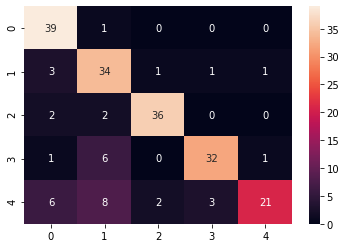

In [ ]:
# Fit the pipeline with the data
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.76      0.97      0.86        40
                                     emma       0.67      0.85      0.75        40
                            d r a c u l a       0.92      0.90      0.91        40
                    the war of the worlds       0.89      0.80      0.84        40
uncle tom’s cabin or life among the lowly       0.91      0.53      0.67        40

                                 accuracy                           0.81       200
                                macro avg       0.83      0.81      0.80       200
                             weighted avg       0.83      0.81      0.80       200



### KNN with TF-IDF ngrams

In [ ]:
pipe = Pipeline([('bow', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),  
                 ('model', KNeighborsClassifier())])

0.855


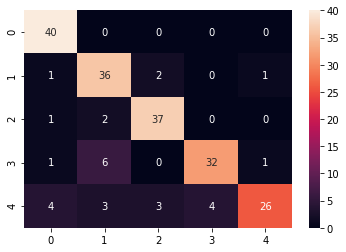

In [ ]:
# Fit the pipeline with the data
y_pred_class=calc_accuracy_and_confusion_matrix(X_train, X_test, y_train, y_test)

In [ ]:
calc_classification_report(y_pred_class)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.85      1.00      0.92        40
                                     emma       0.77      0.90      0.83        40
                            d r a c u l a       0.88      0.93      0.90        40
                    the war of the worlds       0.89      0.80      0.84        40
uncle tom’s cabin or life among the lowly       0.93      0.65      0.76        40

                                 accuracy                           0.85       200
                                macro avg       0.86      0.86      0.85       200
                             weighted avg       0.86      0.85      0.85       200



# evaluation

### NB

In [ ]:
clf1 = make_pipeline( CountVectorizer(), MultinomialNB())
NBpredicted=cross_val_score(clf1, X,y, cv=10)
NBpredicted

array([0.93, 0.95, 0.93, 0.92, 0.93, 0.94, 0.93, 0.97, 0.93, 0.96])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (NBpredicted.mean(), NBpredicted.std() * 2))


Accuracy: 0.94 (+/- 0.03)


In [ ]:
clf2 = make_pipeline( CountVectorizer(ngram_range=(1,2)), MultinomialNB())
NBpredicted2=cross_val_score(clf2, X,y, cv=10)
NBpredicted2

array([0.95, 0.94, 0.91, 0.95, 0.9 , 0.95, 0.93, 0.95, 0.95, 0.96])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (NBpredicted2.mean(), NBpredicted2.std() * 2))


Accuracy: 0.94 (+/- 0.04)


### DS 

In [ ]:

clf3 = make_pipeline( CountVectorizer(),tree.DecisionTreeClassifier())
DTpredicted=cross_val_score(clf3, X,y, cv=10)
DTpredicted

array([0.7 , 0.71, 0.8 , 0.76, 0.76, 0.75, 0.77, 0.74, 0.73, 0.73])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (DTpredicted.mean(), (DTpredicted.std() * 2)))


Accuracy: 0.75 (+/- 0.06)


### SVC

In [ ]:
clf4 = make_pipeline( CountVectorizer(),TfidfTransformer(),SVC())
SVCpredicted=cross_val_score(clf4, X,y, cv=10)
SVCpredicted

array([0.93, 0.92, 0.92, 0.94, 0.92, 0.92, 0.93, 0.99, 0.95, 0.96])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (SVCpredicted.mean(), (SVCpredicted.std() * 2)))


Accuracy: 0.94 (+/- 0.04)


In [ ]:
clf5 = make_pipeline( CountVectorizer(ngram_range=(1,2)),TfidfTransformer(),SVC())
SVCpredicted2=cross_val_score(clf5, X,y, cv=10)
SVCpredicted2

array([0.91, 0.91, 0.9 , 0.94, 0.93, 0.91, 0.91, 0.97, 0.94, 0.94])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (SVCpredicted2.mean(), (SVCpredicted2.std() * 2)))


Accuracy: 0.93 (+/- 0.04)


### KNN 

In [ ]:
clf6 = make_pipeline(CountVectorizer(ngram_range=(1,2)),TfidfTransformer(),KNeighborsClassifier())
KNNpredicted=cross_val_score(clf6, X,y, cv=10)
KNNpredicted


array([0.82, 0.83, 0.8 , 0.85, 0.83, 0.9 , 0.84, 0.87, 0.86, 0.88])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (KNNpredicted.mean(), (KNNpredicted.std() * 2)))


Accuracy: 0.85 (+/- 0.06)


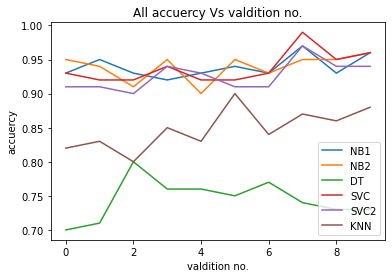

In [ ]:
x=range(len(NBpredicted))
y_1=NBpredicted
y_2=NBpredicted2
y_3=DTpredicted
y_4=SVCpredicted
y_5=SVCpredicted2
y_6=KNNpredicted
plt.plot(x, y_1 ,label='NB1')
plt.plot(x, y_2,label='NB2')
plt.plot(x, y_3,label='DT')
plt.plot(x, y_4,label='SVC')
plt.plot(x, y_5,label='SVC2')
plt.plot(x, y_6,label='KNN')

plt.title('All accuercy Vs valdition no.')
plt.xlabel('valdition no.')
plt.ylabel('accuercy')
plt.legend()
plt.show()



```
# This is formatted as code
```

# bringing our model down 


In [ ]:
mo2=get_randomsample2(review,title1)


In [ ]:
X2 = mo2['Text']
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
y2 = LE.fit_transform(mo['label'])



In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.20, random_state = 0,stratify=mo2['label'])

In [ ]:
pipe = Pipeline([('bow', CountVectorizer(ngram_range=(1,2))), 
                 ('model', MultinomialNB())])

0.73


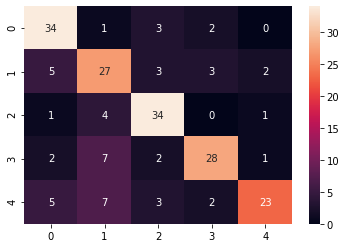

In [ ]:
 y_pred_class2=calc_accuracy_and_confusion_matrix(X_train2, X_test2, y_train2, y_test2)

In [ ]:
calc_classification_report(y_pred_class2)

                                           precision    recall  f1-score   support

        alice’s adventures in wonderland        0.72      0.85      0.78        40
                                     emma       0.59      0.68      0.63        40
                            d r a c u l a       0.76      0.85      0.80        40
                    the war of the worlds       0.80      0.70      0.75        40
uncle tom’s cabin or life among the lowly       0.85      0.57      0.69        40

                                 accuracy                           0.73       200
                                macro avg       0.74      0.73      0.73       200
                             weighted avg       0.74      0.73      0.73       200

